## Example of plotting and fitting in python

Programmer:  Ralf Bundschuh    bundschuh.2@osu.edu

Versions:

  2021-12-29  initial version

Load matplotlib, numpy, and os.path so that we can use them

In [13]:
from matplotlib import pyplot as plt
import os
import numpy as np

Make sure the matplotlib graphs show up in our notebook

In [14]:
%matplotlib inline

Load data from our derivative calculation (the path may have to be adjusted if you use a nonstandard location for your session files)

In [15]:
derivative_data=np.loadtxt(os.path.expanduser('derivative_test.dat'))

Look at first five lines of data to make sure it was read correctly

In [16]:
derivative_data[:5]

array([[ -1.        ,  -1.31538638,  -3.38015696,  -7.88532891],
       [ -1.30103   ,  -1.60926814,  -3.98225766,  -9.08946934],
       [ -1.60205999,  -1.90670158,  -4.58432783, -10.2937083 ],
       [ -1.90308999,  -2.20592766,  -5.18639037, -11.502636  ],
       [ -2.20411998,  -2.50605429,  -5.78845099, -12.5883292 ]])

Extract only the rows with a log10(mesh size) (first column) between -1 and -8 since those are what we want to fit to

In [17]:
linear_range_data=derivative_data[(derivative_data[:,0]>=-8.) & (derivative_data[:,0]<=-1.)]
linear_range_data

array([[ -1.        ,  -1.31538638,  -3.38015696,  -7.88532891],
       [ -1.30103   ,  -1.60926814,  -3.98225766,  -9.08946934],
       [ -1.60205999,  -1.90670158,  -4.58432783, -10.2937083 ],
       [ -1.90308999,  -2.20592766,  -5.18639037, -11.502636  ],
       [ -2.20411998,  -2.50605429,  -5.78845099, -12.5883292 ],
       [ -2.50514998,  -2.80663225,  -6.39051119, -13.1364799 ],
       [ -2.80617997,  -3.10743614,  -6.99257141, -12.6641708 ],
       [ -3.10720997,  -3.40835306,  -7.59462862, -12.4228644 ],
       [ -3.40823997,  -3.70932651,  -8.19666926, -11.9094223 ],
       [ -3.70926996,  -4.01032823,  -8.79898172, -12.0728272 ],
       [ -4.01029996,  -4.31134408,  -9.40173562, -11.5203822 ],
       [ -4.31132995,  -4.61236702,  -9.9939922 , -11.1789597 ],
       [ -4.61235995,  -4.9133936 , -10.5183367 , -11.5770482 ],
       [ -4.91338994,  -5.21442247, -11.252373  , -10.5627119 ],
       [ -5.21441994,  -5.51545023, -10.7182882 , -10.3297815 ],
       [ -5.51544993,  -5

Fit a straight line (polynomial of degree 1) to the first two columns (note that column indices in python are zero-based!)

The first entry in the result is the slope and the second entry is the offset

In [18]:
linear_fit_coefficients=np.polyfit(linear_range_data[:,0],linear_range_data[:,1],deg=1)
linear_fit_coefficients

array([ 1.00188144, -0.29772771])

Make a nice looking string out of the fit coefficients

In [19]:
fit_title='{:.1f}*x{:+.1f}'.format(linear_fit_coefficients[0],linear_fit_coefficients[1])
fit_title

'1.0*x-0.3'

Generate the actual plot

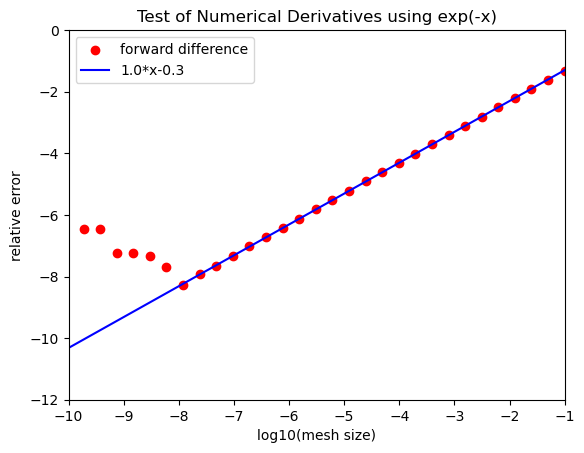

In [20]:
# set up the plot
fig=plt.figure()
ax1=fig.add_subplot(111)

# axes labels and title
ax1.set_ylabel('relative error')
ax1.set_xlabel('log10(mesh size)')
ax1.set_title('Test of Numerical Derivatives using exp(-x)')

# axes ranges
ax1.set_xlim([-10,-1])
ax1.set_ylim([-12,0])

# the actual plot of the data (column 2 vs column 1, but zero-based)
ax1.scatter(derivative_data[:,0],derivative_data[:,1],c='r',label='forward difference')

# for the fit lines we have to generate a bunch of x values first
x=np.linspace(-10,-1,50)
ax1.plot(x, linear_fit_coefficients[0]*x+linear_fit_coefficients[1],c='b',label=fit_title)

# show the legend
ax1.legend(loc='upper left')

# make sure the plot show up
plt.show()

Save the figure as a jpeg image (note that this will be written back into the session directory under the user directory)

In [21]:
fig.savefig(os.path.expanduser('derivative_test_python.jpg'))